In [1]:
import numpy as np, math
import matplotlib.pyplot as plt

In [2]:
def exp(knN):
    th = -2 * math.pi * knN
    return complex(math.cos(th), math.sin(th))              # 복소수 클래스

In [3]:
def dft(g):
    N = len(g)
    dst = [sum(g[n] * exp(k*n/N ) for n in range(N)) for k in range(N) ]
    return np.array(dst)

In [4]:
def idft(g):
    N = len(g)
    dst = [sum(g[n] * exp(-k*n/N) for n in range(N)) for k in range(N) ]
    return np.array(dst) / N

In [5]:
fmax = 1000      # 샘플링 주파수 1000 Hz: 최대주파수의 2배
dt = 1/fmax      # 샘플링 간격
t = np.arange(0, 1, dt)         # 시간 리스트

In [6]:
g1 = np.sin(2*np.pi*50*t)
g2 = np.sin(2*np.pi*120*t)
g3 = np.sin(2*np.pi*260*t)
g = g1 * 0.6 + g2 * 0.9 + g3 * 0.2          # 신호 합성

In [7]:
N = len(g)                          # 신호 길이
df = fmax/N                         #
f = np.arange(0, N, df)
xf = dft(g) * dt                    # 사용자 정의 DFT
g2 = idft(xf) / dt

C:\Anaconda3\envs\py39tf2\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


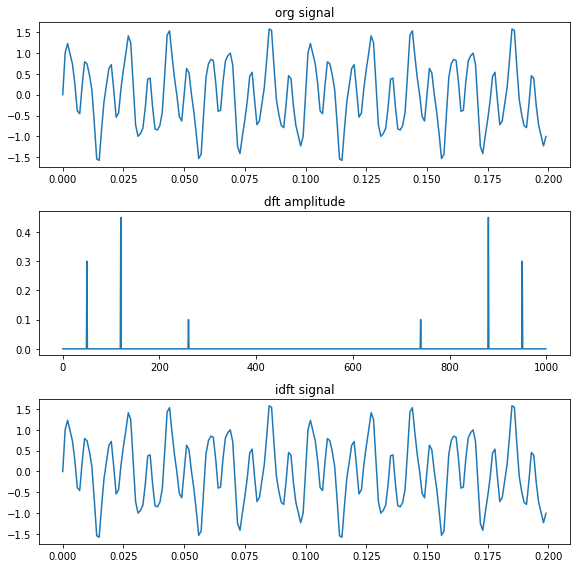

In [8]:
plt.figure(figsize=(8,8))
plt.subplot(3,1,1), plt.plot(t[0:200], g[0:200]), plt.title('org signal')
plt.subplot(3,1,2), plt.plot(f, np.abs(xf) ), plt.title('dft amplitude')
plt.subplot(3,1,3), plt.plot(t[0:200], g2[0:200]), plt.title('idft signal')
plt.tight_layout()
plt.show()